#### Using Survival Analysis for analyzing the employee attrition. The individuals in a population who have not been attrited are labeled as right-censored, we did not  know when they will be attrited. Hence choosing Survival Analysis as it is best suited for censored data

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.preprocessing import OneHotEncoder
from lifelines.statistics import logrank_test
import seaborn as sns
from lifelines.utils import concordance_index
pd.set_option('display.max_columns', 100)

In [2]:
raw_df = pd.read_csv('HR-Employee-Attrition.csv')
raw_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
raw_df.shape

(1470, 35)

### Splitting Train & Test dataset

In [4]:
raw_train, raw_test = train_test_split(raw_df,test_size=0.30,random_state=42,stratify=raw_df['Attrition'])
raw_train.shape,raw_test.shape

((1029, 35), (441, 35))

In [5]:
train_summary = raw_train.describe()
train_summary

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,36.945578,809.543246,9.298348,2.893100,1.0,1013.352770,2.706511,65.141885,2.731778,2.082604,2.706511,6548.270165,14465.365403,2.720117,15.196307,3.154519,2.744412,80.0,0.791059,11.323615,2.741497,2.759961,6.938776,4.233236,2.189504,4.130224
std,9.165414,397.666730,8.160561,1.031715,0.0,596.725917,1.085528,20.345204,0.709833,1.084906,1.109460,4611.459610,7231.472741,2.497351,3.644241,0.361621,1.088398,0.0,0.846185,7.688945,1.240230,0.715116,5.950930,3.583634,3.222919,3.535334
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,479.000000,2.000000,2.000000,1.0,488.000000,2.000000,47.000000,2.000000,1.000000,2.000000,2994.000000,8053.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,805.000000,7.000000,3.000000,1.0,1001.000000,3.000000,65.000000,3.000000,2.000000,3.000000,5063.000000,14506.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1543.000000,4.000000,82.000000,3.000000,3.000000,4.000000,8446.000000,21016.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2062.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,17.000000,15.000000,17.000000


### Removing columns with zero variation i.e.only constant values

In [6]:
drop_col = train_summary.columns[train_summary.loc['std',] == 0]
drop_col

Index(['EmployeeCount', 'StandardHours'], dtype='object')

In [7]:
train_df = raw_train.drop(drop_col,axis='columns')
train_df.shape

(1029, 33)

### Convert Attribution to Boolean data type

In [8]:
train_df['Attrition'] =  train_df['Attrition']=='Yes'
train_df['Attrition'].value_counts()

False    863
True     166
Name: Attrition, dtype: int64

## Estimating the survival function using Kaplan-Meier

In [9]:
# duration is define as the number of years employee worked at the company  
T = train_df["YearsAtCompany"]

# Event is define when employee leaves the company
E = train_df["Attrition"]

# fitting kaplan-meier
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1029 total observations, 863 right-censored observations>

Text(0.5, 1.0, 'Survival function of Employee Attrition')

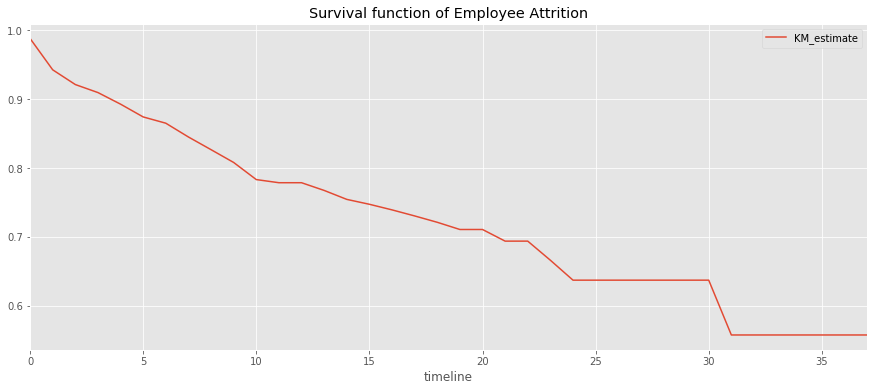

In [10]:
plt.style.use('ggplot')
kmf.survival_function_.plot(figsize=(15,6))
plt.title('Survival function of Employee Attrition')

Text(0.5, 1.0, 'Survival function of Employee Attrition with confidence interval')

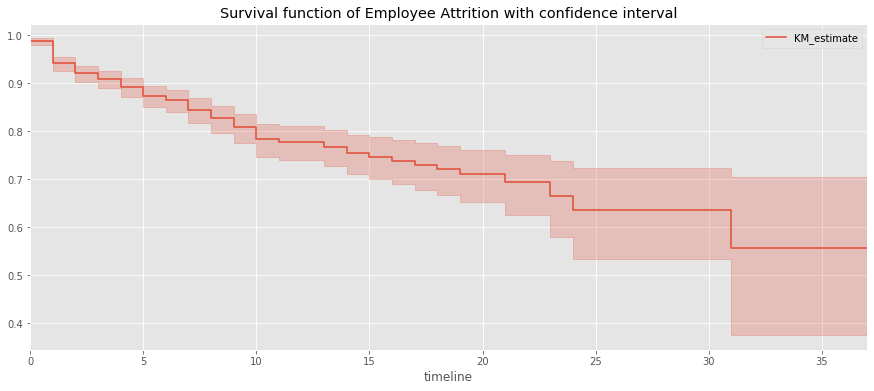

In [11]:
kmf.plot(figsize=(15,6))
plt.title('Survival function of Employee Attrition with confidence interval')

#### Above graph reveals that there is more than 80% chance that employee will not leave the company within 5 years of joining

In [12]:
# As 80% of the data is right censored it is not possible to compute median survial time
kmf.median_survival_time_

inf

### Comparing Survial for employee with and without stock options

In [13]:
train_df['Stock']= train_df['StockOptionLevel'] > 0
train_df['Stock'].replace({True:'Stock',False:'No_Stock'},inplace=True)
train_df['Stock'].value_counts()

Stock       589
No_Stock    440
Name: Stock, dtype: int64

In [14]:
# Log Rank Test : null hypothesis for a log-rank test is that the groups have the same survival
stock = train_df['Stock'] == 'Stock'
results = logrank_test(train_df[stock]["YearsAtCompany"], train_df[~stock]["YearsAtCompany"],
                       train_df[stock]["Attrition"], train_df[~stock]["Attrition"])

results.print_summary()

#### P Value less than 0.005 hence reject the null hypothesis i.e. groups have different survival rate

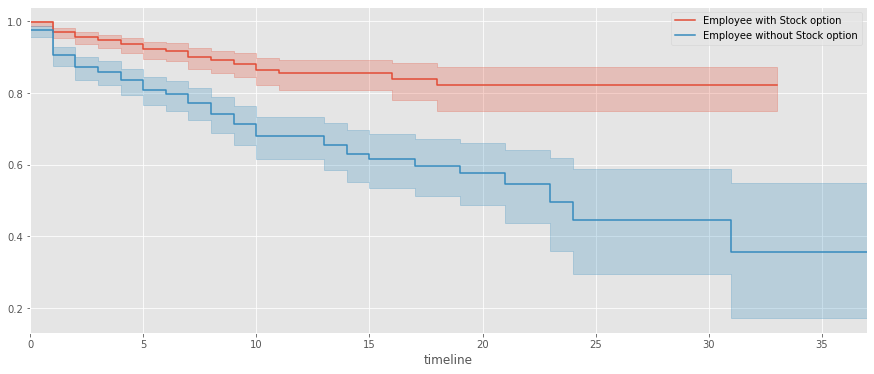

In [15]:
kmf.fit(train_df[stock]["YearsAtCompany"],event_observed=train_df[stock]["Attrition"], label="Employee with Stock option")
kmf.plot(figsize=(15,6))
kmf.fit(train_df[~stock]["YearsAtCompany"],event_observed=train_df[~stock]["Attrition"],label="Employee without Stock option")
kmf.plot(figsize=(15,6))

#### From graph we can see that employee with stock option have grater survival rate i.e. they tend to stay with the organisation longer than the employees wihtout stock option

### Preprate Training data for Cox regression

In [16]:
# remove stock as it is not required
train_df.drop(['Stock'],axis='columns',inplace=True)

# one hot categorical variables
category_feature = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
enc = OneHotEncoder(drop='first',handle_unknown='error')

# create data frame of one hot features
one_hot_df = pd.DataFrame(enc.fit_transform(train_df[category_feature]).toarray(),columns=enc.get_feature_names())

# rename one hot columns
one_hot_df.columns = one_hot_df.columns.str.replace('x0_','')
one_hot_df.columns = one_hot_df.columns.str.replace('x1_','Dept_')
one_hot_df.columns = one_hot_df.columns.str.replace('x2_','Edu_')
one_hot_df.columns = one_hot_df.columns.str.replace('x3_','Job_')
one_hot_df.columns = one_hot_df.columns.str.replace('x4_','')

# add employee id columns for enabling merging of dataset with train dataset
one_hot_df['EmployeeNumber'] = train_df['EmployeeNumber'].values
one_hot_df.head()

,Travel_Frequently,Travel_Rarely,Dept_Research & Development,Dept_Sales,Edu_Life Sciences,Edu_Marketing,Edu_Medical,Edu_Other,Edu_Technical Degree,Job_Human Resources,Job_Laboratory Technician,Job_Manager,Job_Manufacturing Director,Job_Research Director,Job_Research Scientist,Job_Sales Executive,Job_Sales Representative,Married,Single,EmployeeNumber
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1193
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,582
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,813
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1648
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,216


In [17]:
# merge one hot dataframe with train data frame
train_df = train_df.merge(one_hot_df,how='left',on='EmployeeNumber')

# boolean encoding for binary variable
train_df['Gender_enc'] = train_df['Gender'] == 'Male'
train_df['OverTime_enc'] = train_df['OverTime'] == 'Yes'
train_df.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Dept_Research & Development,Dept_Sales,Edu_Life Sciences,Edu_Marketing,Edu_Medical,Edu_Other,Edu_Technical Degree,Job_Human Resources,Job_Laboratory Technician,Job_Manager,Job_Manufacturing Director,Job_Research Director,Job_Research Scientist,Job_Sales Executive,Job_Sales Representative,Married,Single,Gender_enc,OverTime_enc
116,26,False,Travel_Frequently,1283,Sales,1,3,Medical,956,3,Male,52,2,2,Sales Executive,1,Single,4294,11148,1,Y,No,12,3,2,0,7,2,3,7,7,0,7,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,False
578,38,False,Travel_Rarely,1084,Research & Development,29,3,Technical Degree,273,4,Male,54,3,2,Manufacturing Director,4,Married,6261,4185,3,Y,No,18,3,1,1,9,3,1,7,7,1,7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,True,False
196,22,False,Travel_Rarely,253,Research & Development,11,3,Medical,511,1,Female,43,3,1,Research Scientist,2,Married,2244,24440,1,Y,No,13,3,4,1,2,1,3,2,1,1,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,False,False


In [18]:
# drop features
drop_feature = ['Gender','OverTime','EmployeeNumber','Over18'] + category_feature
final_train = train_df.drop(drop_feature,axis='columns')
final_train.sample(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Dept_Research & Development,Dept_Sales,Edu_Life Sciences,Edu_Marketing,Edu_Medical,Edu_Other,Edu_Technical Degree,Job_Human Resources,Job_Laboratory Technician,Job_Manager,Job_Manufacturing Director,Job_Research Director,Job_Research Scientist,Job_Sales Executive,Job_Sales Representative,Married,Single,Gender_enc,OverTime_enc
933,41,False,1206,23,2,4,80,3,3,3,7082,11591,3,16,3,4,0,21,2,3,2,0,0,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,True,True
25,52,False,956,6,2,4,78,3,2,1,5577,22087,3,12,3,2,2,18,3,3,10,9,6,9,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,True
376,38,False,1245,14,3,3,80,3,2,2,9924,12355,0,11,3,4,1,10,3,3,9,8,7,7,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,True,False


### Remove Highly Collinear features as this causes convergence error for cox box regression

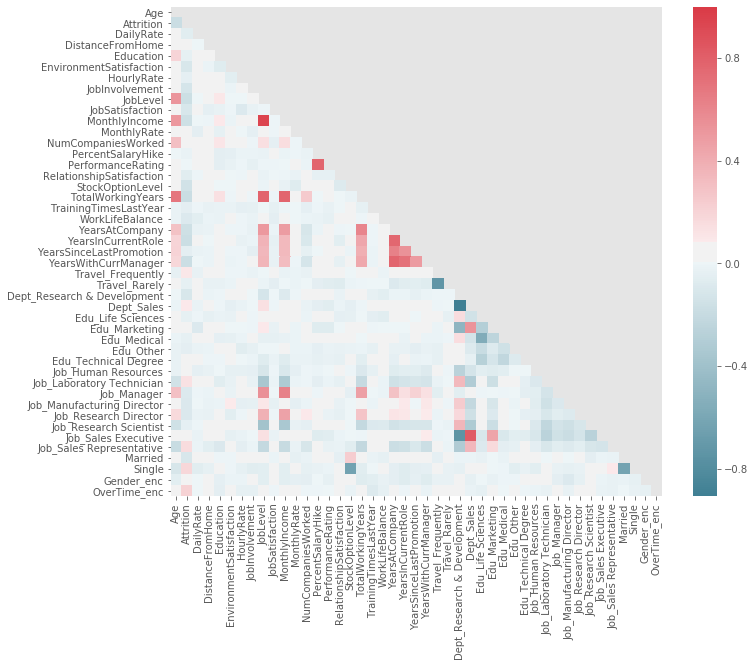

In [19]:
# Compute the correlation matrix
corr = final_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,)

In [20]:
# drop highly collinear features
drop_feature = ['Travel_Rarely','Dept_Sales','Job_Sales Executive','Single']
cph = CoxPHFitter()
cph.fit(final_train.drop(drop_feature,axis='columns'), duration_col='YearsAtCompany', event_col='Attrition')
cph.print_summary()

In [21]:
coeff = pd.DataFrame(cph.params_,columns=['coefficient'])
coeff['Effect'] = coeff['coefficient'].apply(lambda x : math.exp(x))
coeff.sort_values(by='Effect',ascending=False)

,coefficient,Effect
Job_Laboratory Technician,1.613692,5.021318
OverTime_enc,1.474178,4.367446
Job_Sales Representative,1.350213,3.858248
Job_Manufacturing Director,0.601291,1.824472
Travel_Frequently,0.597379,1.817350
Gender_enc,0.378899,1.460675
Job_Research Scientist,0.368664,1.445802
Job_Manager,0.338595,1.402975
JobLevel,0.307435,1.359933
NumCompaniesWorked,0.255748,1.291427


#### Coefficient Interpretation
* The effect for 'PercentSalaryHike' is 0.98 which implies one unit increase in PercentSalaryHike decrease the baseline hazard by 0.02%

* The effect for 'StockOptionLevel' is 0.60 which implies one unit increase in StockOptionLevel decrease the baseline hazard by 40%

* The effect for 'Job_Laboratory Technician' is 5.02 which implies this job type increases the baseline hazard by 400%

### Goodness of Fit on unseen dataset

In [22]:
# Preparaing Test Dataset

# copy orignial test dataset
test_df = raw_test.copy()

# convert attrition to boolean
test_df['Attrition'] =  test_df['Attrition']=='Yes'

# one hot encoding of categorical variables
one_hot_df = pd.DataFrame(enc.transform(test_df[category_feature]).toarray(),columns=enc.get_feature_names())

# Change column names
one_hot_df.columns = one_hot_df.columns.str.replace('x0_','')
one_hot_df.columns = one_hot_df.columns.str.replace('x1_','Dept_')
one_hot_df.columns = one_hot_df.columns.str.replace('x2_','Edu_')
one_hot_df.columns = one_hot_df.columns.str.replace('x3_','Job_')
one_hot_df.columns = one_hot_df.columns.str.replace('x4_','')

# adding employing id column for enabling merging with test dataset
one_hot_df['EmployeeNumber'] = test_df['EmployeeNumber'].values

# merging with test dataset
test_df = test_df.merge(one_hot_df,how='left',on='EmployeeNumber')

# Boolean encoding for binary categorical variables
test_df['Gender_enc'] = test_df['Gender'] == 'Male'
test_df['OverTime_enc'] = test_df['OverTime'] == 'Yes'

# drop unnecessary columns
drop_feature = ['Gender','OverTime','EmployeeNumber','Over18','EmployeeCount',
                'StandardHours','Travel_Rarely', 'Dept_Sales', 'Job_Sales Executive', 'Single'] + category_feature


final_test = test_df.drop(drop_feature,axis='columns')


final_test.sample(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Dept_Research & Development,Edu_Life Sciences,Edu_Marketing,Edu_Medical,Edu_Other,Edu_Technical Degree,Job_Human Resources,Job_Laboratory Technician,Job_Manager,Job_Manufacturing Director,Job_Research Director,Job_Research Scientist,Job_Sales Representative,Married,Gender_enc,OverTime_enc
248,31,False,154,7,4,2,41,2,1,3,2329,11737,3,15,3,2,0,13,2,4,7,7,5,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,True,False
187,25,False,583,4,1,3,87,2,2,1,4256,18154,1,12,3,1,0,5,1,4,5,2,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True,False
366,33,False,922,1,5,1,95,4,4,3,16184,22578,4,19,3,3,1,10,2,3,6,1,0,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,False,False


In [23]:
predict = cph.predict_expectation(final_test,)
result = test_df[['EmployeeNumber','YearsAtCompany','Attrition']].copy()
result['Predict_Attrition'] = predict
result.sample(5,random_state=56)

,EmployeeNumber,YearsAtCompany,Attrition,Predict_Attrition
92,339,11,False,24.773236
28,2045,6,False,6.477431
173,493,2,False,6.150210
204,994,0,True,1.415511
226,593,2,True,3.067019


#### Predict Attrition is the number of years after which employee is expected to attrit. From table we can see that employee who have attrited for them the Predict Attrition is close to the Years at compaby

In [24]:
concordance_index(result['YearsAtCompany'], result['Predict_Attrition'])

0.8412851459032926

In [25]:
concordance_index(result['YearsAtCompany'], result['Predict_Attrition'],result['Attrition'])

0.9429285565507186

### Concordance Index on unseen data is very high which suggest Good Fit